In [1]:

import numpy as np
import pandas as pd
import seaborn as sns


from moseq2_lda.data import load_representations
from moseq2_lda.model import create_lda_pipeline, run_cross_validation, train_lda_pipeline
from moseq2_lda.viz import plot_lda_results, plot_validation_curve, plot_permutation_score, Aesthetics
#%matplotlib qt

In [2]:
model_file = r"F:\moseq\2021-01-15_Meloxicam\2022-09-02_moseq\models-mean-target\rOT_model_1000-5.fixed.p"
index_file = r"F:\moseq\2021-01-15_Meloxicam\2022-09-02_moseq\moseq2-index.role.yaml"

max_syllable = 69

#groups = ['baseline', '4hrs carrageenan', '24hrs saline', '24hrs meloxicam', 'baseline meloxicam']
#palette = sns.color_palette(['#35fab3', '#ff8400', '#f06493', '#020887', '#647aa3'])
#markers = ['o', 's', '^', 'P', 'X']


#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan + saline']
#palette = sns.color_palette(['#35fab3', '#ff8400', '#f06493'])
#markers = ['o', 's', '^']
#groups = None
#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan', '6d carrageenan', '14d carrageenan']

#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan', '6d carrageenan', '14d carrageenan', '24hrs carrageenan + saline', '24hrs carrageenan + meloxicam']
#palette = sns.color_palette('deep', n_colors=len(groups))
#markers = ['o', 'v', '^', '<', '>', 's', 'p', 'P', 'D', 'X', '*', 'h', 'H', 'd'][:len(groups)]

groups = [
#    'CAR bsl + saline',
#    'CAR bsl + mel',
#    'CAR 4h',
#    'CAR 24h + saline',
#    'CAR 24h + mel',
#    'CAR 6d',
#    'CAR 14d',

    'CAR ctrl bsl',
    'CAR ctrl 4h',
    'CAR ctrl 24h',
    'CAR ctrl 6d',
    'CAR ctrl 14d',
]


#exclude_uuids = [] # [
#    '2e4fb355-0907-4c6c-9318-11556620a9c0'
#]

In [3]:
representations = load_representations(index_file, model_file, max_syllable=max_syllable, groups=groups)
aes = Aesthetics(groups)

pruned 2447 transitions which are never used


[10 31 40 45 42 43  3  2 13 37 30  6 33 26 11 20  5 17 44 41 36  8 28 12
  0  7  4 24 21 34 39 49 16 14 18] [32  1  9 27 47 48 25 23 46 29 15 19 22 38 35]
['CAR ctrl 14d' 'CAR ctrl 6d' 'CAR ctrl 4h' 'CAR ctrl bsl' 'CAR ctrl 24h'
 'CAR ctrl 14d' 'CAR ctrl bsl' 'CAR ctrl 14d' 'CAR ctrl 24h'
 'CAR ctrl 14d' 'CAR ctrl bsl' 'CAR ctrl 6d' 'CAR ctrl 4h' 'CAR ctrl 4h'
 'CAR ctrl bsl' 'CAR ctrl 6d' 'CAR ctrl 4h' 'CAR ctrl 6d' 'CAR ctrl 6d'
 'CAR ctrl 24h' 'CAR ctrl 4h' 'CAR ctrl 24h' 'CAR ctrl bsl' 'CAR ctrl 24h'
 'CAR ctrl 6d' 'CAR ctrl bsl' 'CAR ctrl bsl' 'CAR ctrl 24h' 'CAR ctrl 14d'
 'CAR ctrl 24h' 'CAR ctrl 14d' 'CAR ctrl 4h' 'CAR ctrl 14d' 'CAR ctrl 6d'
 'CAR ctrl 4h'] ['CAR ctrl bsl' 'CAR ctrl bsl' 'CAR ctrl 6d' 'CAR ctrl 14d' 'CAR ctrl 6d'
 'CAR ctrl 24h' 'CAR ctrl 4h' 'CAR ctrl bsl' 'CAR ctrl 14d' 'CAR ctrl 4h'
 'CAR ctrl 6d' 'CAR ctrl 24h' 'CAR ctrl 4h' 'CAR ctrl 14d' 'CAR ctrl 24h']
Best value for parameter "shrinkage" is 0.30
Achieving a mean accuracy of ~48.0% ± 16.60% (stdev) on c

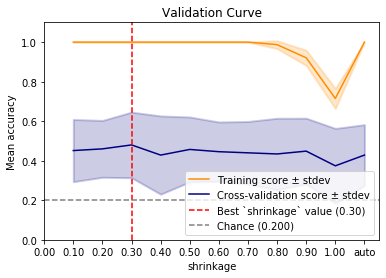

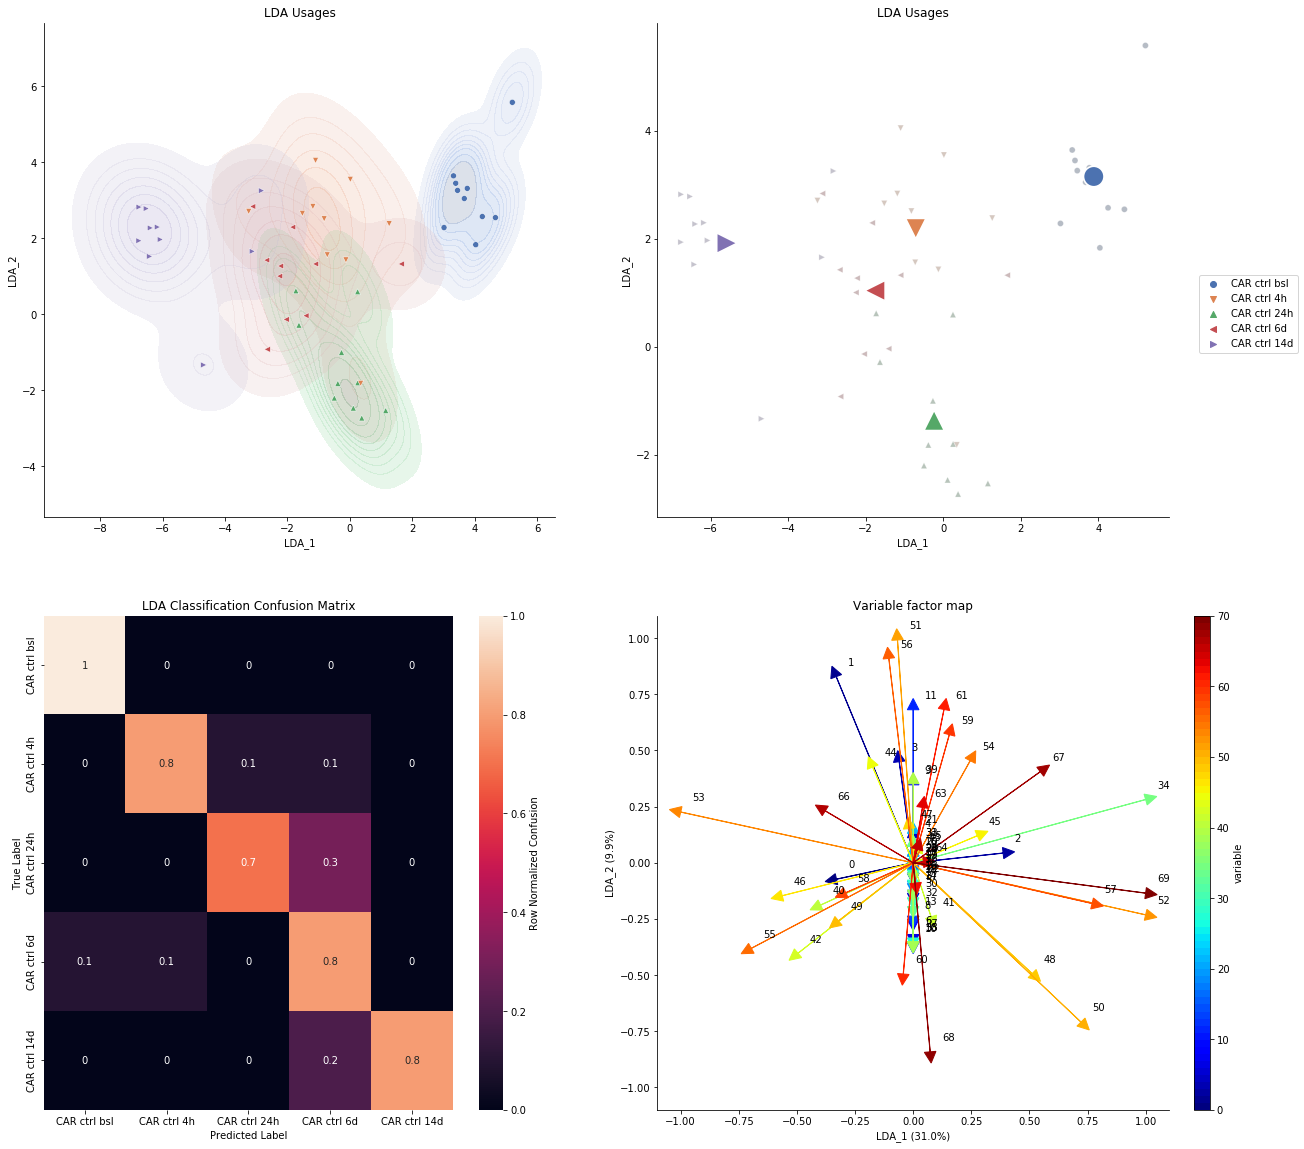

In [5]:
results = train_lda_pipeline(representations, 'usages')
plot_validation_curve(results.cv_result)
fig, axs, df = plot_lda_results(results.final, representations, aes=aes, title='LDA Usages')

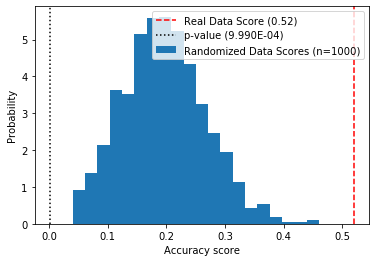

: 

In [6]:
plot_permutation_score(results.final.estimator, results.data.usages, results.data.groups)